# Обучение без учителя


## Подготовка датасета

In [1]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster")

print("Path to dataset files:", path)

100%|██████████| 57.5k/57.5k [00:00<00:00, 15.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster/versions/1


In [11]:
dataset = pd.read_csv(path + '/ObesityDataSet.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [12]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [13]:
vals = dataset["NObeyesdad"].unique()
vals

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [71]:
# сохраняем только числовые столбцы. Категориальные кодируем в числовые. Целевую переменную (если она есть) - убираем
cols_for_clusters =  dataset.drop(columns=['NObeyesdad']).columns.tolist()
cols = dataset.columns.tolist()

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
dataset['family_history_with_overweight'] = label_encoder.fit_transform(dataset['family_history_with_overweight'])
dataset['FAVC'] = label_encoder.fit_transform(dataset['FAVC'])
dataset['CAEC'] = label_encoder.fit_transform(dataset['CAEC'])
dataset['SMOKE'] = label_encoder.fit_transform(dataset['SMOKE'])
dataset['SCC'] = label_encoder.fit_transform(dataset['SCC'])
dataset['CALC'] = label_encoder.fit_transform(dataset['CALC'])
dataset['MTRANS'] = label_encoder.fit_transform(dataset['MTRANS'])

In [16]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II


In [17]:
df= dataset[cols_for_clusters].copy() # делаем копию, чтобы не было сюрпризов с исходным набором данных

In [18]:
X = df
y = label_encoder.fit_transform(dataset['NObeyesdad'])
yvals = dataset["NObeyesdad"]



### Метод главных компонентов (Principal Component Analysis, PCA)



In [19]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

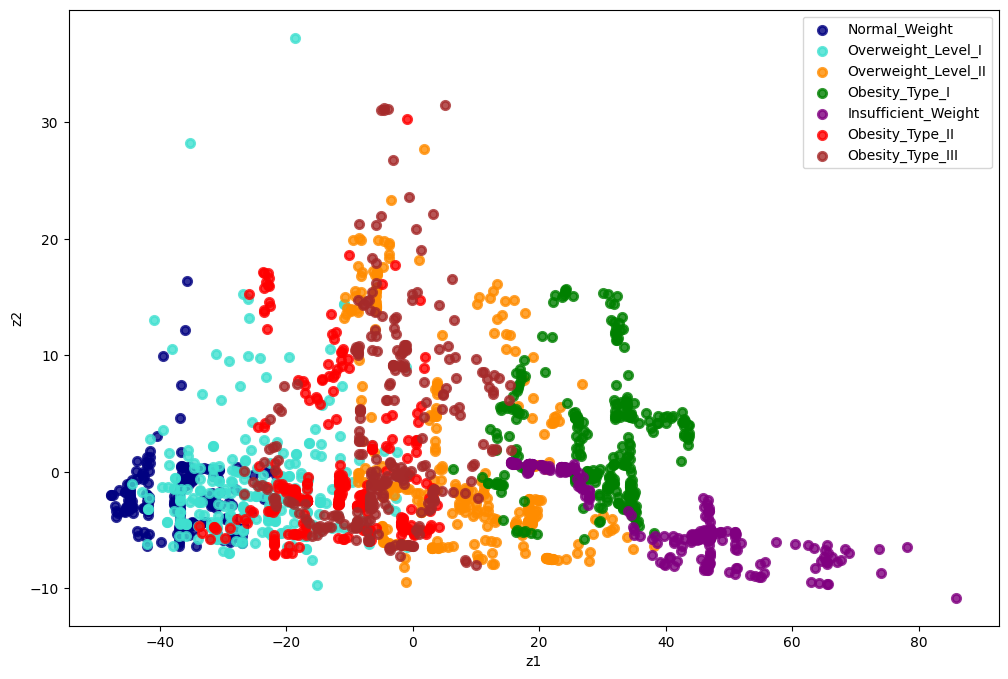

In [25]:
pca = PCA(n_components=2)
X_new = pca.fit(X).transform(X)


plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange", "green", "purple", "red", "brown"]
lw = 2

for color, i, target_name in zip(colors, range(7), cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [26]:
pca.explained_variance_ratio_

array([0.94063899, 0.05359519])

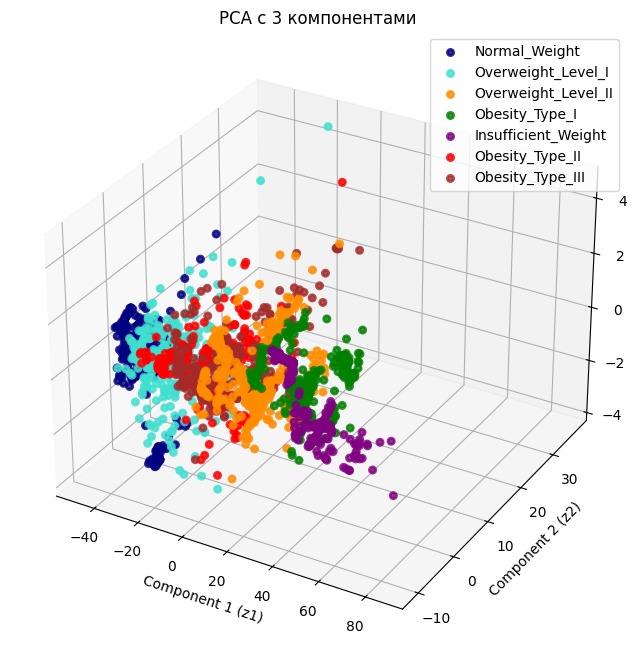

In [54]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_new = pca.fit_transform(X)

colors = ["navy", "turquoise", "darkorange", "green", "purple", "red", "brown"]
lw = 2

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

for color, i, target_name in zip(colors, range(7), cols_for_clusters):
    ax.scatter(
        X_new[y == i, 0], X_new[y == i, 1], X_new[y == i, 2],
        color=color, alpha=0.8, lw=lw, label=vals[i]
    )

ax.set_xlabel("Component 1 (z1)")
ax.set_ylabel("Component 2 (z2)")
ax.set_zlabel("Component 3 (z3)")
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA c 3 компонентами")
plt.show()

In [28]:
pca.explained_variance_ratio_

array([0.94063899, 0.05359519, 0.00143369])



### Независисый анализ компонентов (Independent Component Analysis, ICA)



In [31]:
from sklearn.decomposition import FastICA


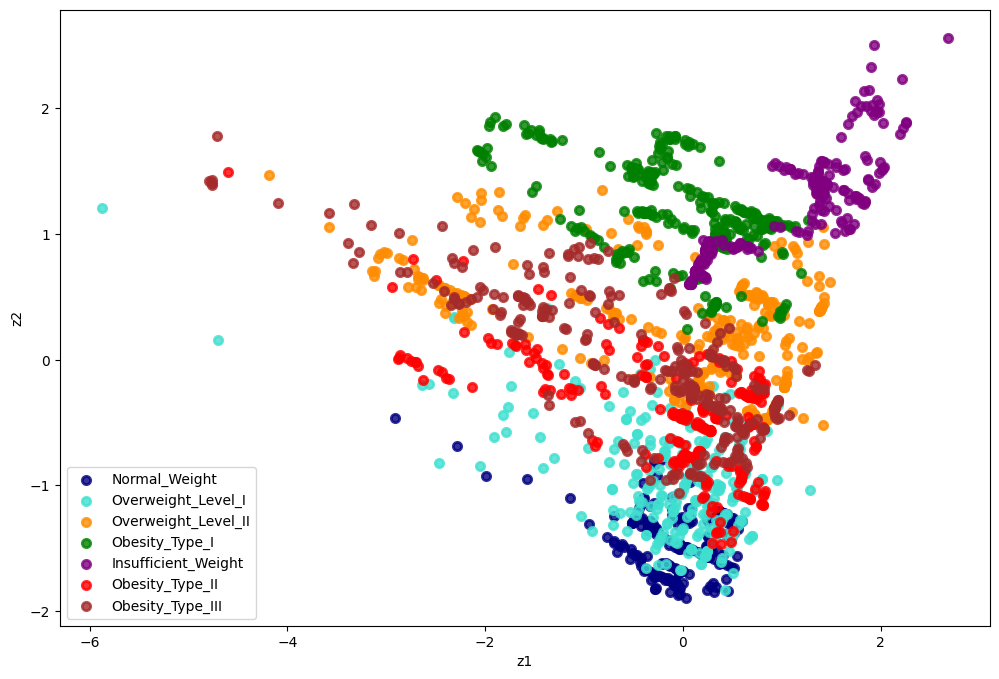

In [32]:
fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange", "green", "purple", "red", "brown"]
lw = 2

for color, i, target_name in zip(colors, range(7), cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

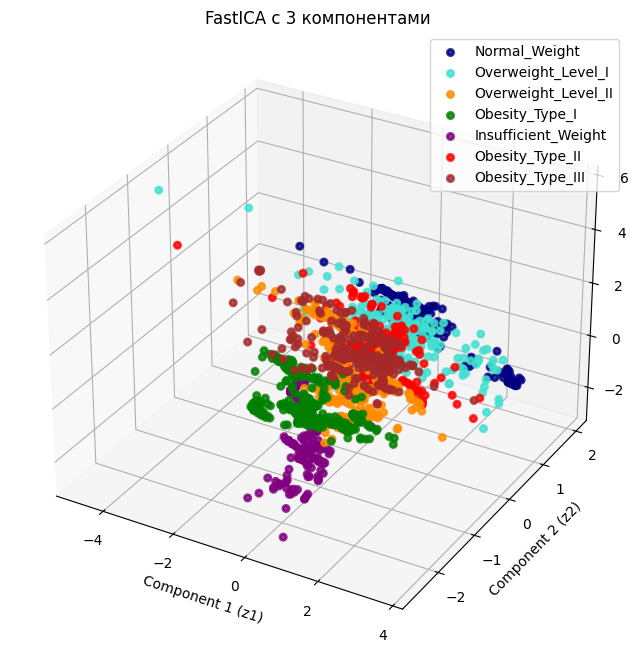

In [55]:
fast_ica = FastICA(n_components=3)
X_new = fast_ica.fit_transform(X)

colors = ["navy", "turquoise", "darkorange", "green", "purple", "red", "brown"]
lw = 2

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

for color, i, target_name in zip(colors, range(7), cols_for_clusters):
    ax.scatter(
        X_new[y == i, 0], X_new[y == i, 1], X_new[y == i, 2],
        color=color, alpha=0.8, lw=lw, label=vals[i]
    )

ax.set_xlabel("Component 1 (z1)")
ax.set_ylabel("Component 2 (z2)")
ax.set_zlabel("Component 3 (z3)")
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("FastICA c 3 компонентами")
plt.show()

### Kernel PCA


In [36]:
from sklearn.decomposition import KernelPCA

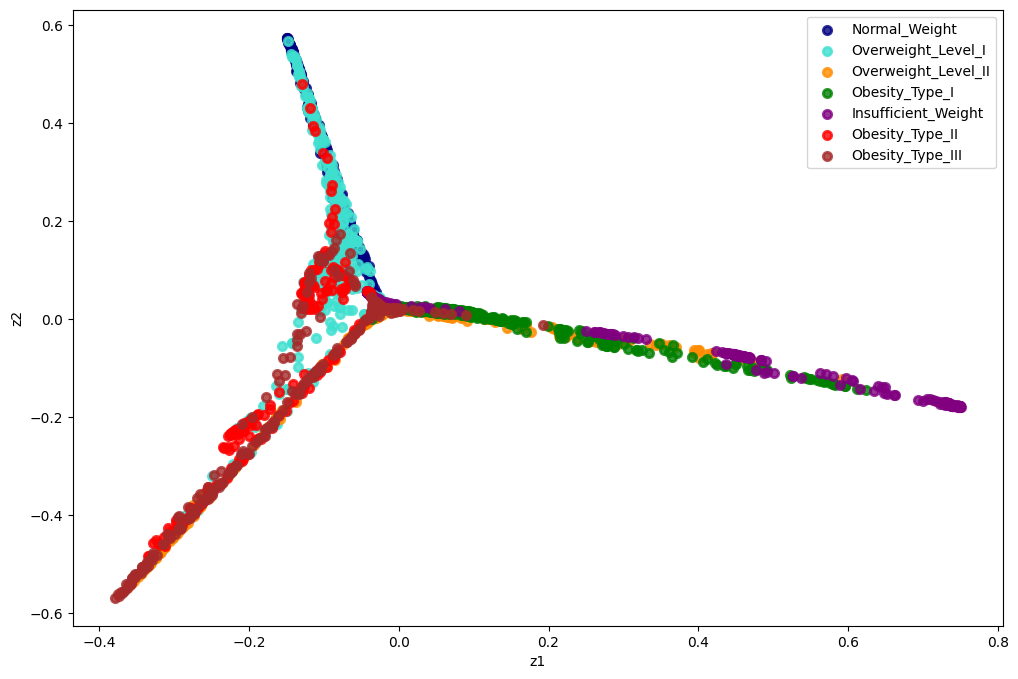

In [37]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange", "green", "purple", "red", "brown"]
lw = 2

for color, i, target_name in zip(colors, range(7), cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

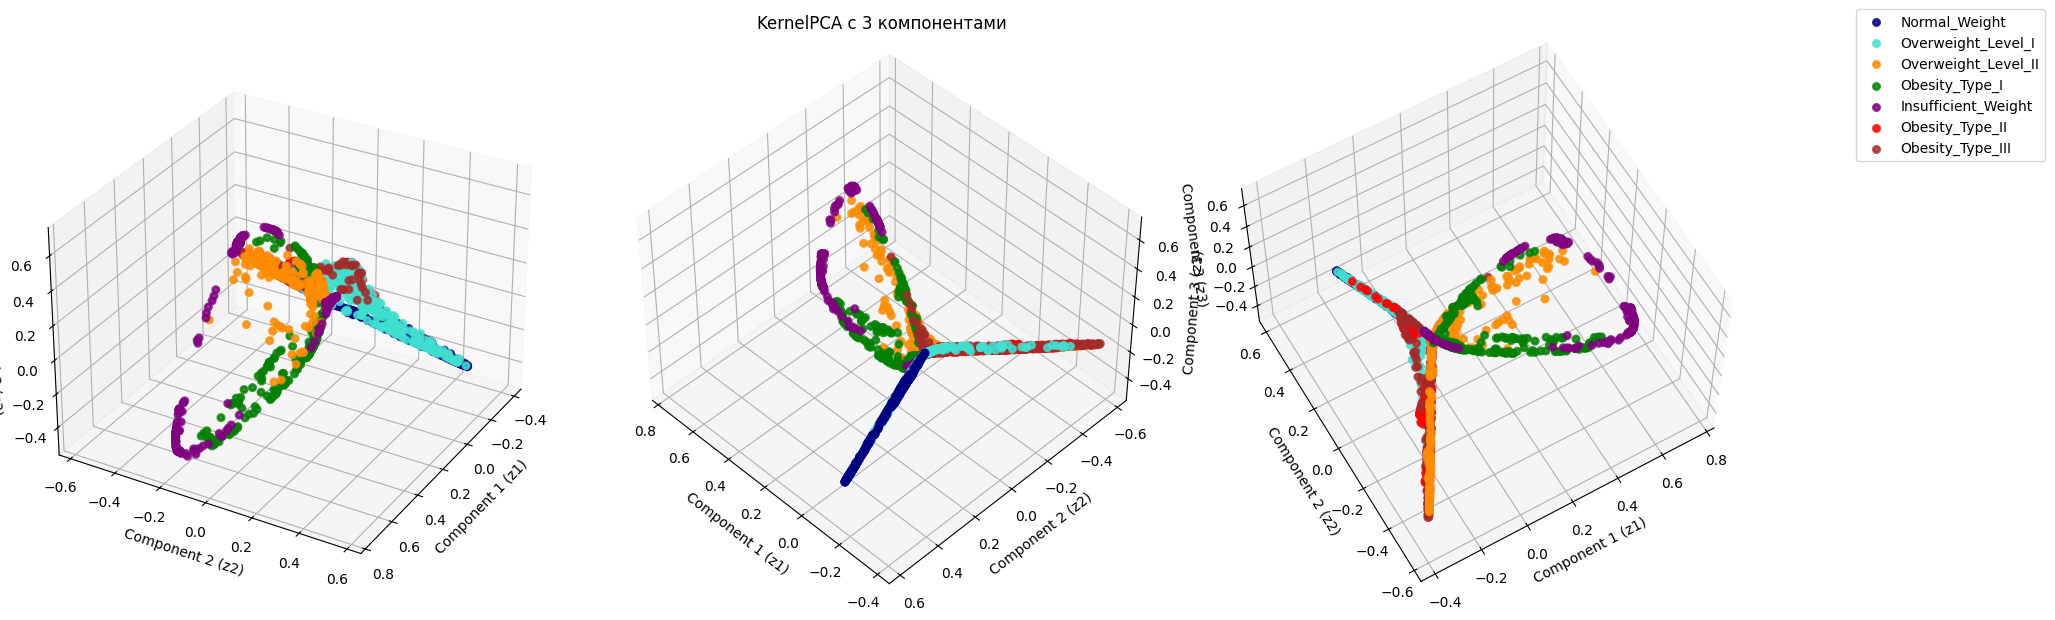

In [52]:
rbf_pca = KernelPCA(n_components=3, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

colors = ["navy", "turquoise", "darkorange", "green", "purple", "red", "brown"]
lw = 2

fig = plt.figure(figsize=(18, 6))

angles = [(30, 30), (45, 135), (60, 240)]

for idx, angle in enumerate(angles, start=1):
    ax = fig.add_subplot(1, 3, idx, projection="3d", elev=angle[0], azim=angle[1])

    for color, i, target_name in zip(colors, range(7), vals):
        ax.scatter(
            X_new[y == i, 0], X_new[y == i, 1], X_new[y == i, 2],
            color=color, alpha=0.8, lw=lw, label=target_name
        )

    ax.set_xlabel("Component 1 (z1)")
    ax.set_ylabel("Component 2 (z2)")
    ax.set_zlabel("Component 3 (z3)")

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc="upper right", bbox_to_anchor=(1.15, 1))

plt.suptitle("KernelPCA c 3 компонентами", y=0.98)
plt.tight_layout()
plt.show()


### tSNE



##### Использование в Python

In [56]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

In [57]:
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (2111, 16)
New Shape of X:  (2111, 2)
Kullback-Leibler divergence after optimization:  0.39552271366119385
No. of iterations:  999


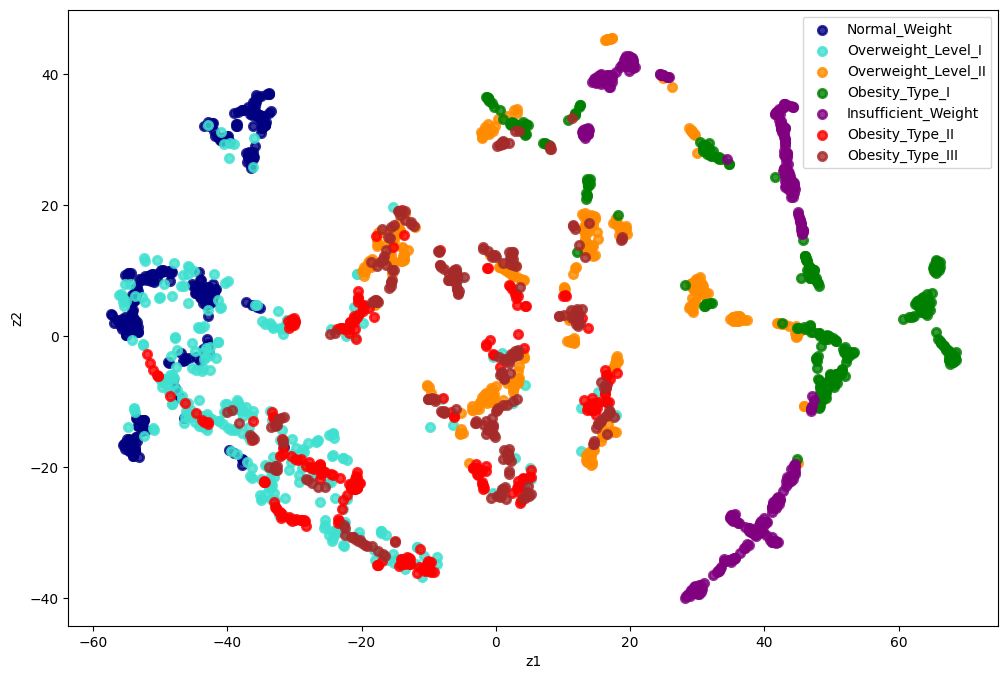

In [58]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange", "green", "purple", "red", "brown"]
lw = 2

for color, i, target_name in zip(colors, range(7), cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [59]:
tsne = TSNE(n_components=3)
X_new = tsne.fit_transform(X)

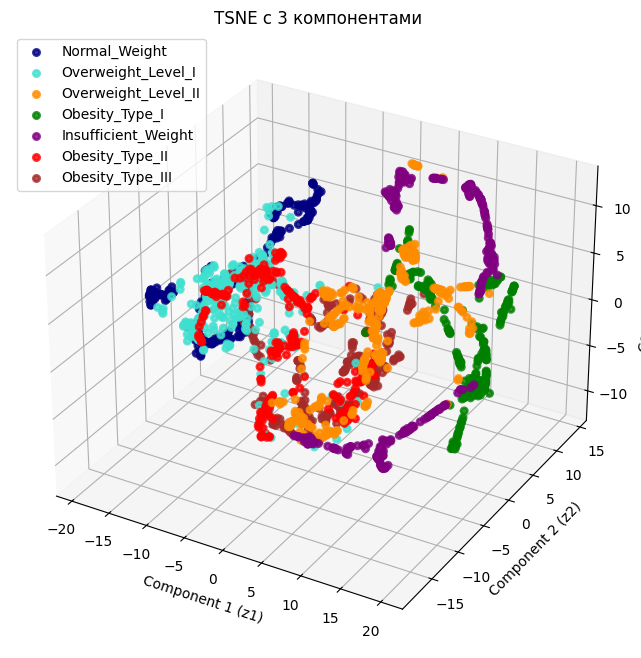

In [60]:
colors = ["navy", "turquoise", "darkorange", "green", "purple", "red", "brown"]
lw = 2

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

for color, i, target_name in zip(colors, range(7), cols_for_clusters):
    ax.scatter(
        X_new[y == i, 0], X_new[y == i, 1], X_new[y == i, 2],
        color=color, alpha=0.8, lw=lw, label=vals[i]
    )

ax.set_xlabel("Component 1 (z1)")
ax.set_ylabel("Component 2 (z2)")
ax.set_zlabel("Component 3 (z3)")
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("TSNE c 3 компонентами")
plt.show()

# Поиск выбросов. DBSCAN



## DBSCAN для кластеризации

In [61]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [91]:
dbscan_cluster1 = DBSCAN(eps = 3.3, min_samples = 3)
X_new = dbscan_cluster1.fit(X)

In [92]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 5
Estimated no. of noise points: 88
v_measure = 0.08447009971748369


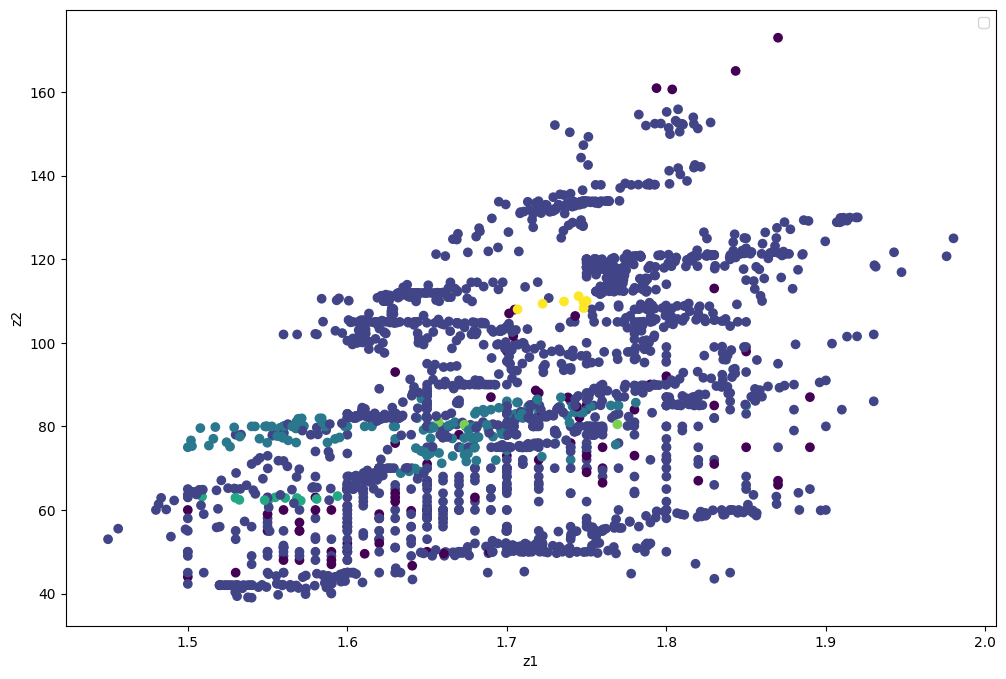

In [93]:
plt.figure(figsize=(12,8))
#["navy", "turquoise", "darkorange", "green", "purple", "red", "brown"]
colors = ["navy", "turquoise", "darkorange", "green", "purple"]
lw = 2

plt.scatter(
        X[cols[2]], X[cols[3]],c=dbscan_cluster1.labels_
    )

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Чтобы правильно опрделить число eps, воспользуемся правилом локтя.

Для этого выведем график изменения средних расстояний от каждой точки до min_samples ближайших.

Подробнее о NearestNeighbors можно почитать тут:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors

In [112]:
from sklearn.neighbors import NearestNeighbors

min_samples = 6

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

In [113]:
import sklearn
#возможные метрики расстояния
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

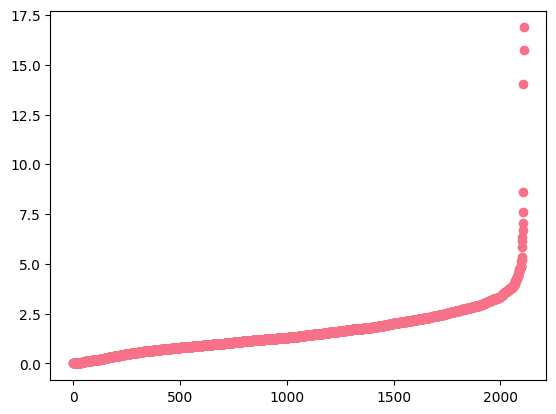

In [114]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

eps  выбирают в точке изгиба графика

## DBSCAN для определения выбросов

In [115]:
dbscan = DBSCAN(eps = 3, min_samples = min_samples)
print(dbscan)

DBSCAN(eps=3, min_samples=6)


In [116]:
pred = dbscan.fit_predict(X)

In [117]:
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 14
Estimated no. of noise points: 185
v_measure = 0.22214002148394385


In [118]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

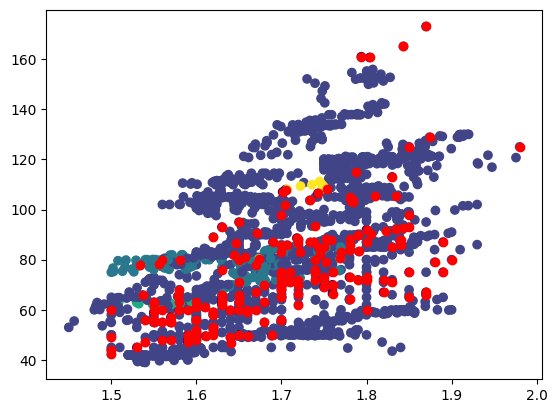

In [120]:
plt.scatter( X[cols[2]], X[cols[3]],c=dbscan_cluster1.labels_)
plt.scatter(values[cols[2]], values[cols[3]], color='r')
plt.show()

# Задание

1. Изучить теорию
1. Реализовать рассмотренные методы на своем датасете (признаков должно быть более 5)
1. Визуализировать результаты